### Data Science for Humanities 2
## Session: Python's Data Science Stack
### Part 1: Seaborn
#### Summer term 23
##### Prof. Goran Glavaš, Lennart Keller

# Seaborn

__Objective:__ Statistical visualizations.

High-level API based Matplotlib with strong integration of pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("penguins")

In [3]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


### Relational Plots (relplot)

__High-level API:__

Seaborn functions work on entire datasets and take care of many steps, such as aggregating data automatically.

__Example:__ `relplot`

The `relplot` function is designed to visualize static relationships of all kinds:

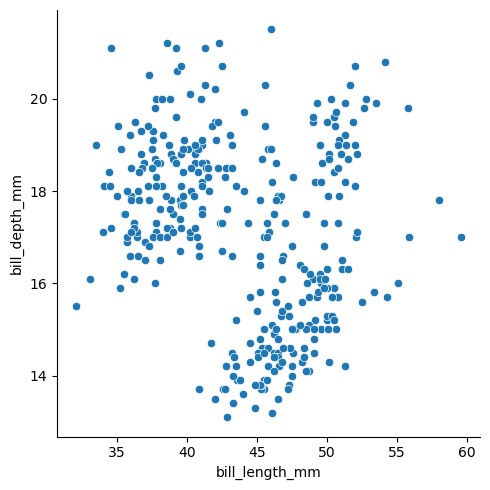

In [6]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm", #just type in the columns you would like to visualize
    data=df,
)

With the help of a few arguments of the plotting function, you can add more variables to the plot.

Here, for example, the coloring of the scatter dots indicates the species of the penguins:

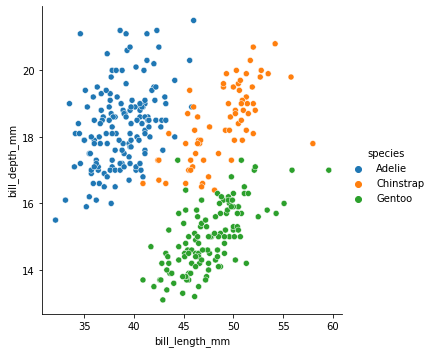

In [5]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    hue="species",
    data=df,
)

We can also change the dot's size according to their weights

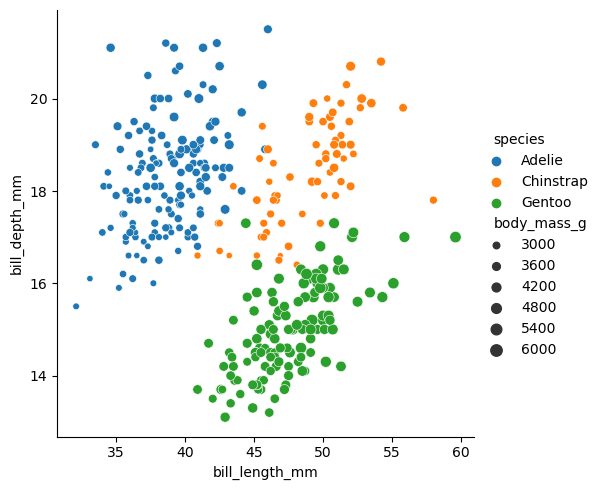

In [7]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    hue="species",
    size="body_mass_g", #additional information added to your legend
    data=df,
)

Using the parameters `col` and `row`, multiple plots can be created based on a categorical variable:

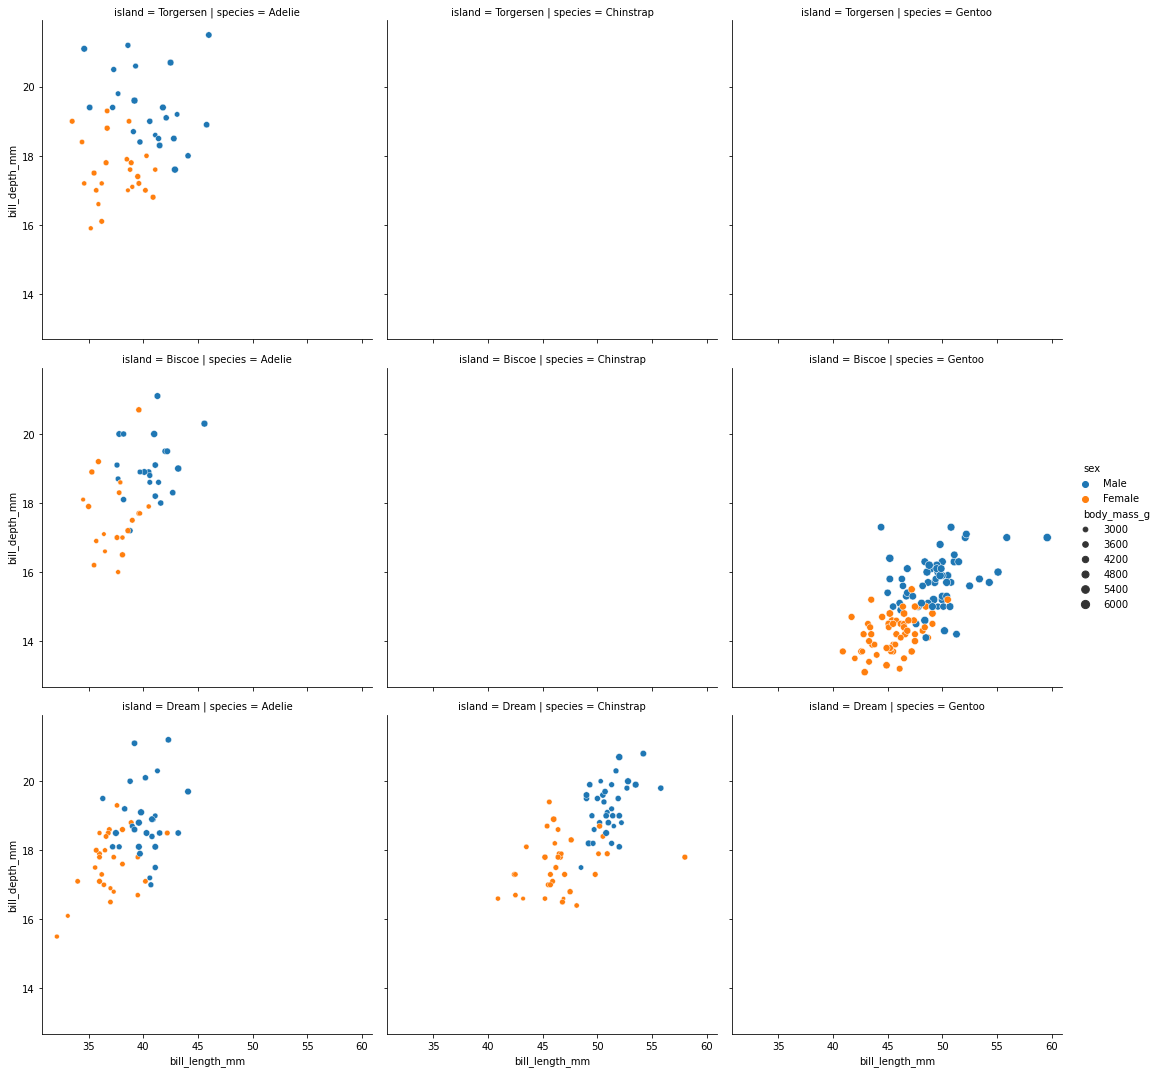

In [7]:
sns.relplot(
    x="bill_length_mm", y="bill_depth_mm",
    hue="sex",
    size="body_mass_g",
    col="species", #choose species within additional diagramms
    row="island",  #combined with species use island linked to specieas as a row
    data=df,
)

Continuous relationships can also be visualized using line plots (more on that later)...

## Plot types:

Seaborn provides functions for different types of visualizations:

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

### Distributions (displot)

Generate histograms or similar plots.

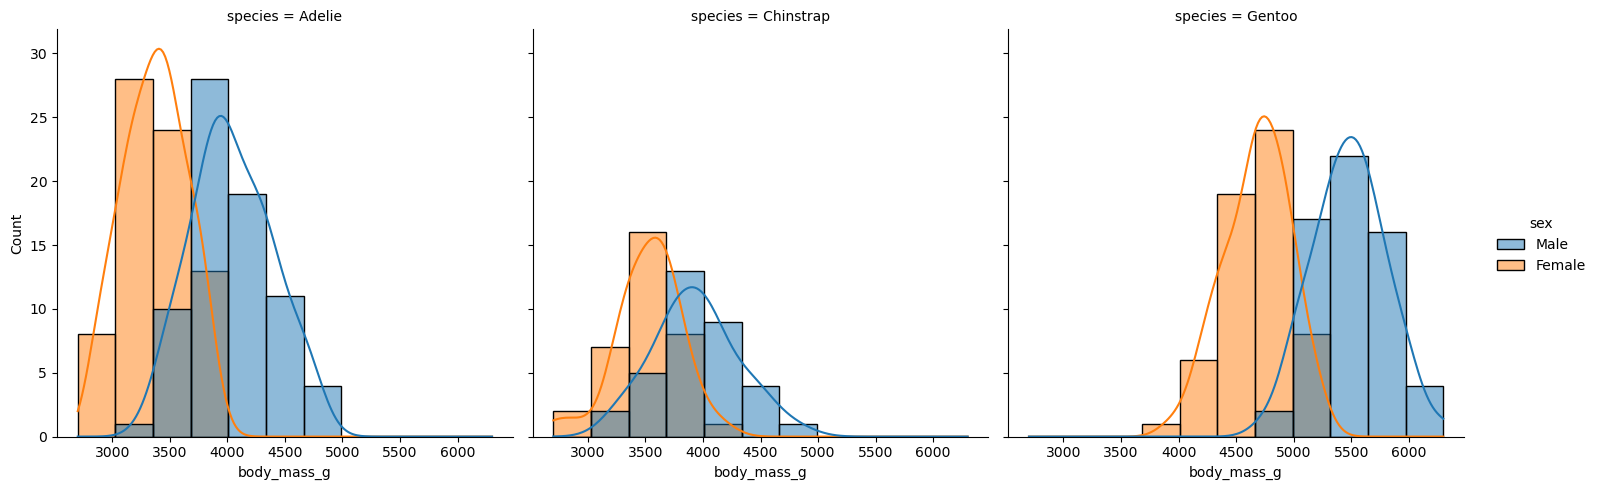

In [10]:
sns.displot(
    x="body_mass_g", col="species",
    hue="sex",
    kde=True, #kde: shows a curve around the boxes
    data=df
)

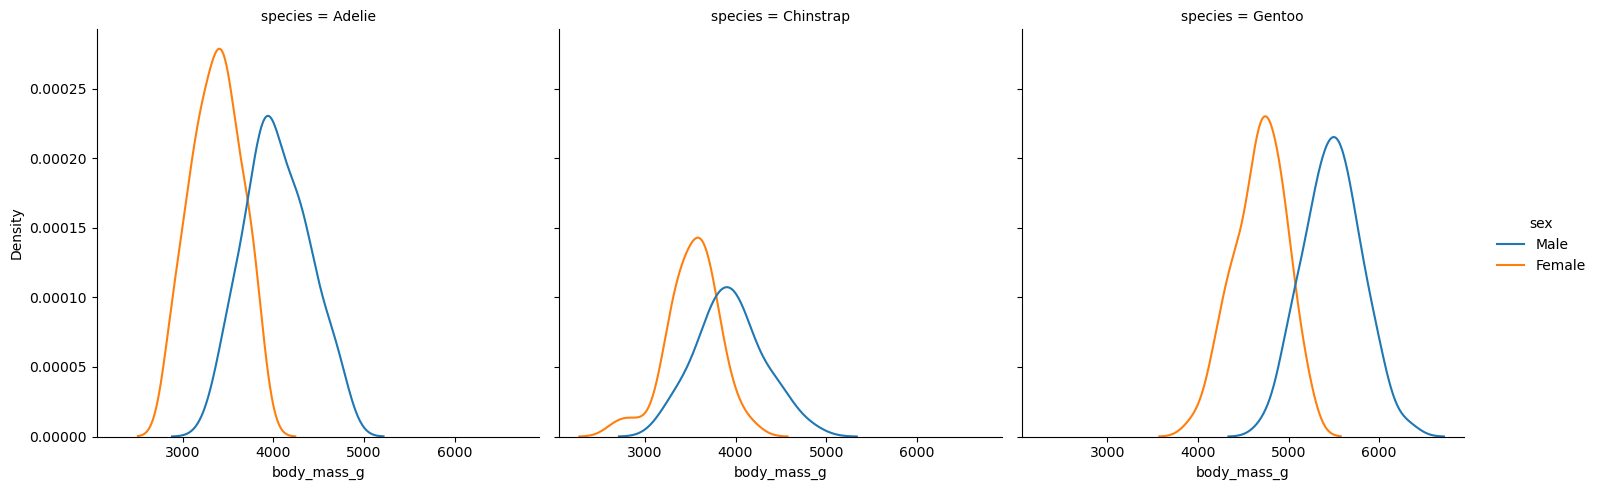

In [11]:
sns.displot(
    x="body_mass_g", col="species",
    hue="sex",
    kind="kde", #kind: only the curve
    data=df
)

### Categorical data (catplot)

Generate plots showing distributions split by certain values for categorical variables.

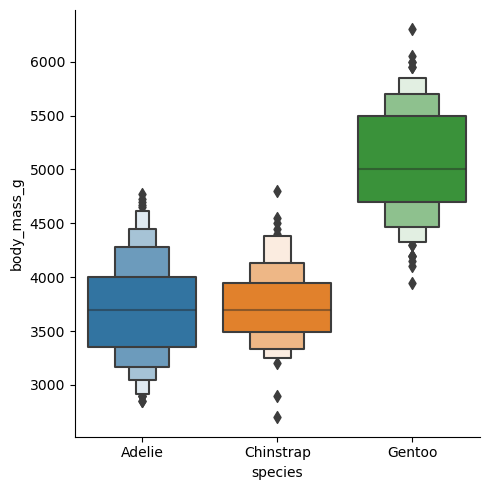

In [12]:
sns.catplot(
    x="species", y="body_mass_g",
    kind="boxen", #different boxplots
    data=df
)

However, it also works *without* classes...

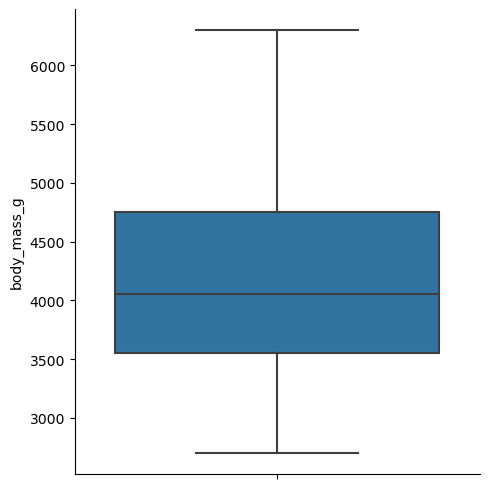

In [13]:
sns.catplot(
    y="body_mass_g",
    kind="box", #only one box
    data=df
)

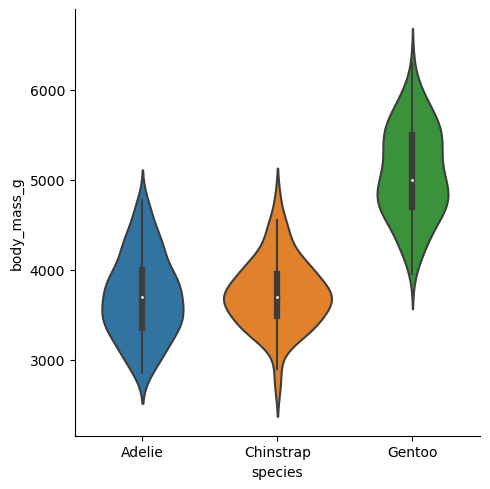

In [14]:
sns.catplot(
    x="species", y="body_mass_g",
    kind="violin", #violin shaped
    data=df
)

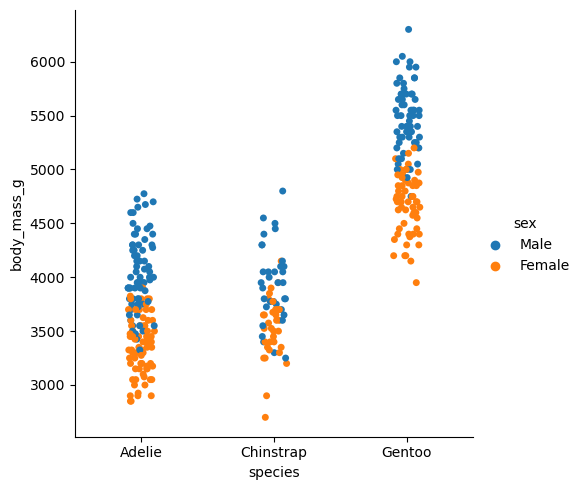

In [15]:
sns.catplot(
    x="species", y="body_mass_g",
    hue="sex",
    data=df
)

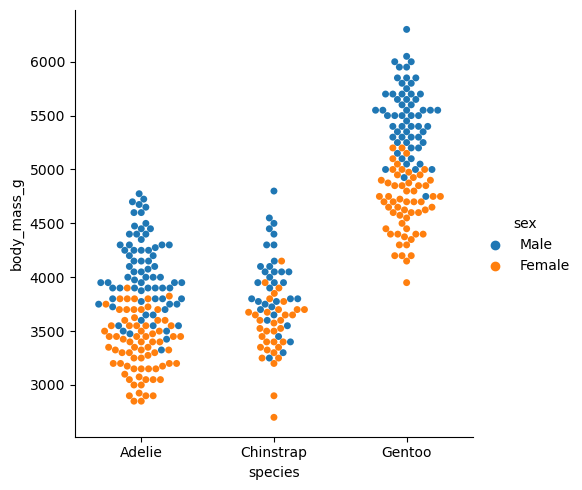

In [16]:
sns.catplot(
    x="species", y="body_mass_g",
    hue="sex",
    kind="swarm", #swarm distribution
    data=df
)

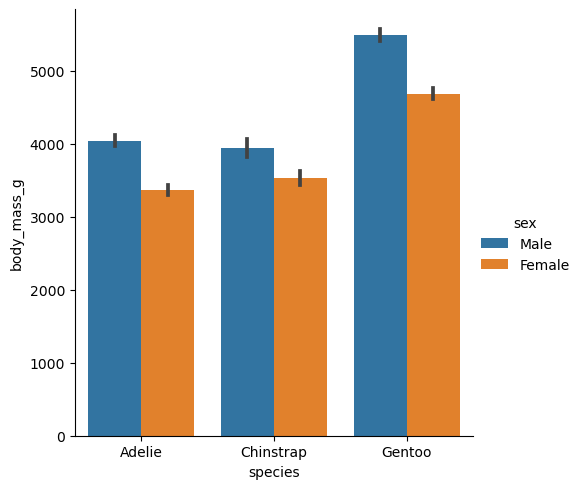

In [17]:
sns.catplot(
    x="species", y="body_mass_g",
    hue="sex",
    kind="bar", #just bars
    data=df
)

### Regression plot (lmplot)

Fits a regression model to the data to be visualized and also plots certain model parameters.

Can be a neat way to visualize (linear) relations within your data.

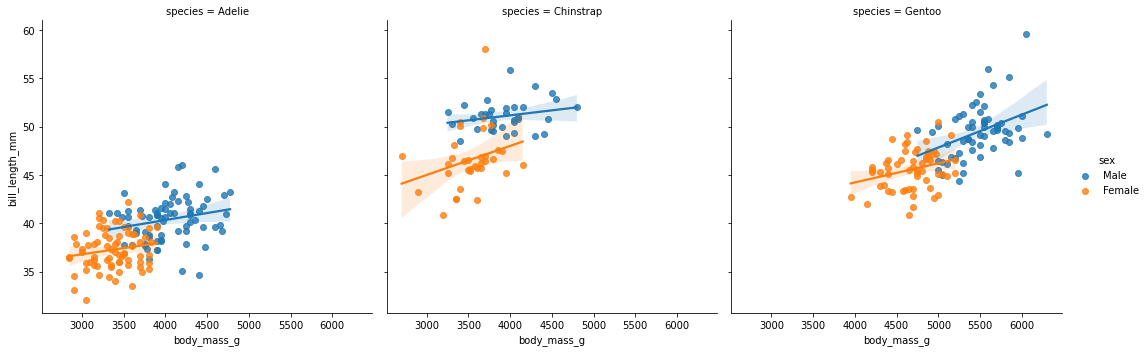

In [16]:
sns.lmplot(
    x="body_mass_g", y="bill_length_mm",
    hue="sex",
    col="species",
    data=df,
)

### Multivariate Beziehungen (pairplot)

Especially in exploratory data analysis, it can be informative to plot different measurements or display formats in combination to gain more "global" insights.

The `pairplot`, for example, plots all variables of a data set against each other:

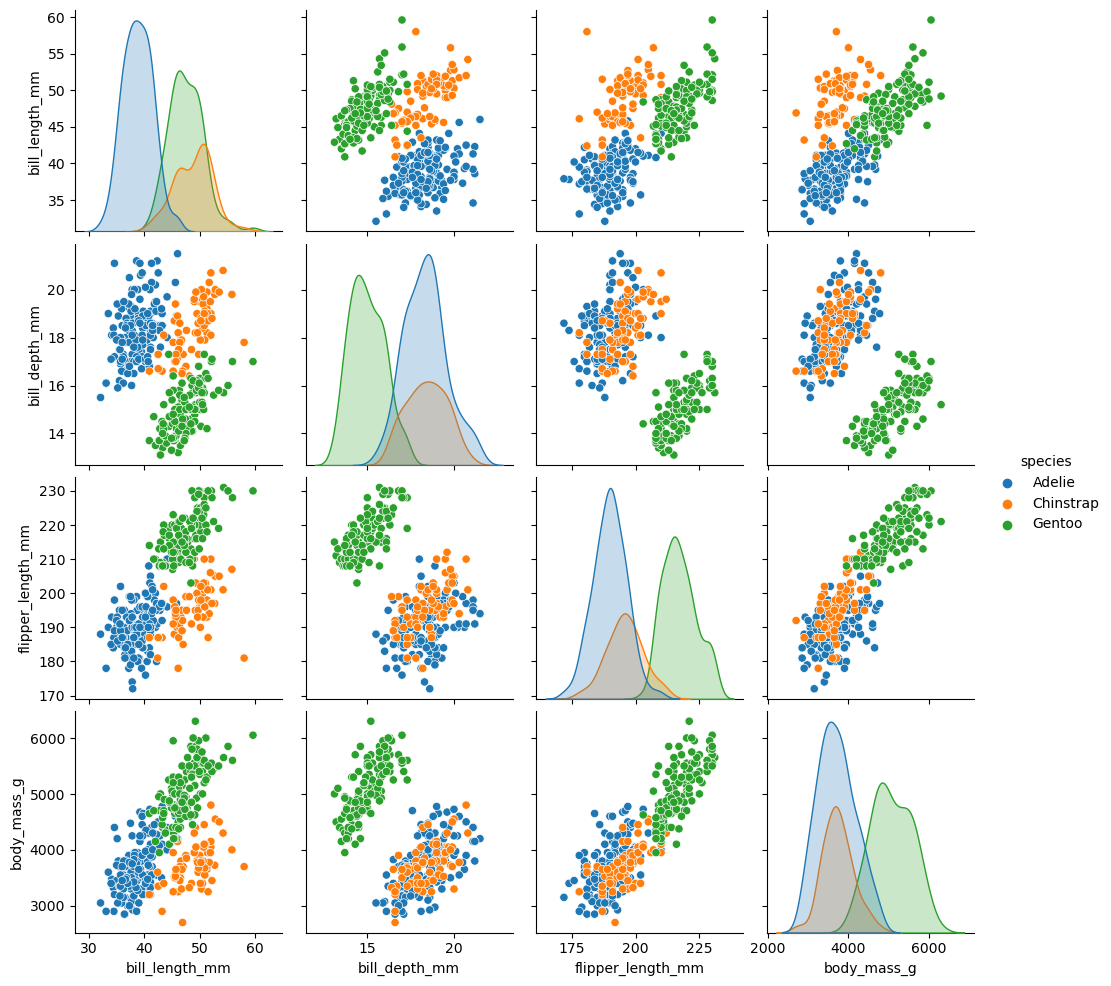

In [18]:
sns.pairplot(hue="species", data=df)

### Combine histograms and scatterplot as one (jointplot)

With the `jointplot` the display types histogram and scatterplot are combined:

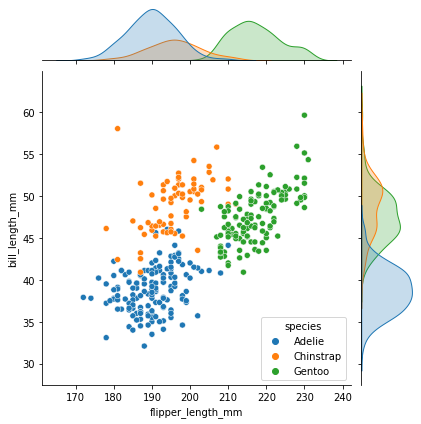

In [18]:
sns.jointplot(
    x="flipper_length_mm", y="bill_length_mm",
    hue="species",
    data=df
)

## Seaborn and Pandas: Data Formats

Seaborn is designed to work with Panda's `DataFrames`.

The whole DateFrame can be passed with the `data` parameter and then columns can be selected using their name.

In [40]:
data = pd.DataFrame({
    "x": np.linspace(0, 20, 10000), #Return evenly spaced numbers over a specified interval.
    "y": np.sin(np.linspace(0, 20, 10000))
})

<AxesSubplot:xlabel='x', ylabel='y'>

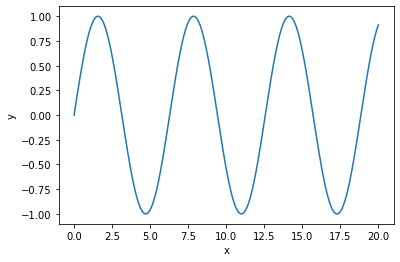

In [20]:
sns.lineplot(x="x", y="y", data=data)

However, Seaborn also accepts other data types:

<AxesSubplot:>

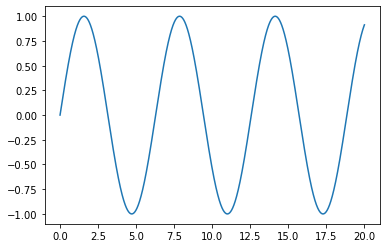

In [21]:
x = np.linspace(0, 20, 10000)
y = np.sin(x)

sns.lineplot(x=x, y=y)

<AxesSubplot:ylabel='Count'>

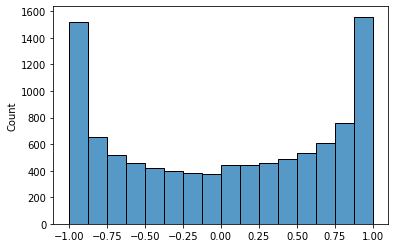

In [22]:
sns.histplot(y)

etc..

But of course you lose many of the helpful features of the `DataFrame` integration. (__Most notably:__ Automatic axes labeling!).

### `DateFrames`: Long- vs. Wide-form

`DataFrames` can contain data in different formats. For example, in longform format, where each variable has its own column.

Or in wideform format, which is more like traditional Excel spreadsheets and only contrasts two values.

![](https://seaborn.pydata.org/_images/data_structure_19_0.png)

`pandas` is best at handling longform-based data:

In [19]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


Here the data for the vast majority of plots are automatically aggregated and correctly prepared.

For example, here the spread of the number of passenger per month is automatically aggregated by year:

<AxesSubplot:xlabel='year', ylabel='passengers'>

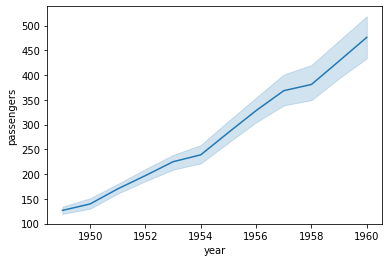

In [24]:
sns.lineplot(x="year", y="passengers", data=flights) #first define which you like to choose as x-axis and y-axis

<AxesSubplot:xlabel='year', ylabel='passengers'>

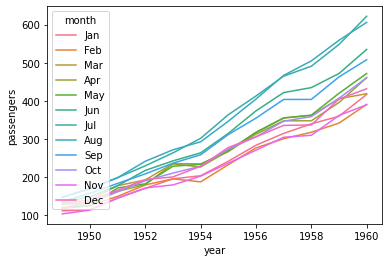

In [25]:
sns.lineplot(x="year", y="passengers", hue="month", data=flights) #colored by month as a third parameter

The same mechanism also works the other way round:

<Axes: xlabel='month', ylabel='passengers'>

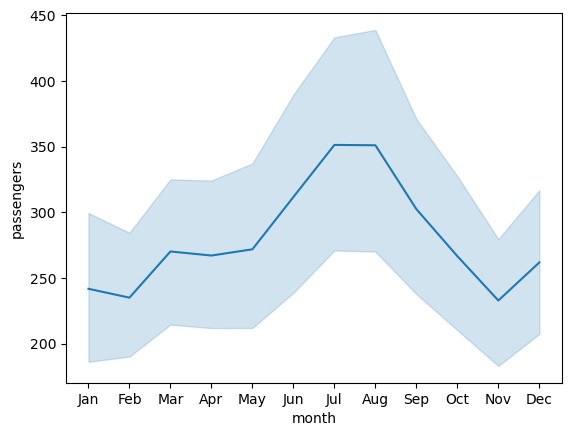

In [22]:
sns.lineplot(x="month", y="passengers", data=flights)

<AxesSubplot:xlabel='month', ylabel='passengers'>

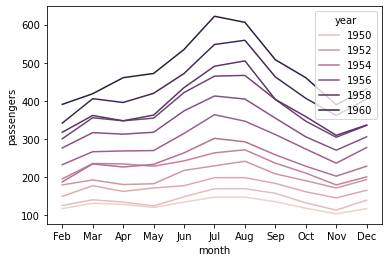

In [27]:
sns.lineplot(x="month", y="passengers", hue="year", data=flights.query("month != 'Jan'")) #every month without january

### Messy Data:

Some datasets also come in more complex formats. For example, different hierarchical levels could be mixed.

In [23]:
freqs = pd.read_csv("freqs-engl.txt", sep="\t")
freqs.head()

FileNotFoundError: [Errno 2] No such file or directory: 'freqs-engl.txt'

__Example:__ Comparing the frequencies of `you` and `thou`for tragedies and comedies.

To generate a histogram of the frequencies of the two words for both genres, we need to convert the data into long-form using the `.melt` method of `DataFrames`.

In [ ]:
#melt shrinks columns to rows according to specific values/variables (repeats superclasses)
#https://pub.towardsai.net/understanding-pandas-melt-pd-melt-362954f8c125
plot_df = freqs.query("genre == 'tragedy' or genre == 'comedy'").melt(
    id_vars=["genre", "title", "year"],
    value_vars=["you", "thou"],
    var_name="token",
    value_name="freq"
)
plot_df

Since we lose data by applying this transformation, it is recommended to save the result in a new `DataFrame`...

In [ ]:
sns.displot(
    x="freq",
    hue="token",
    col="genre",
    kde=True,
    data=plot_df
)

## Matplotlib als Seaborn-Backend und weitere Anpassungsmöglichkeiten.

`seaborn` uses `matplotlib` as a backend framework to create the plots.

This means, it is to extend `seaborn` plots with `matplotlib`.

However, this is not necessary in all cases where you want to customize `seaborn` plots, because `seaborn` itself also provides some functions for this.


For this you have to distinguish between two types of plots:

* `axes_level` plots
* `figure_level` plots

`axes_level` plots return a `matplotlib` `axes` object containing the plot while `figure_level` plots return a `FacetGrid` object containing the plot.

### `FacetGrid`

`FacetGrid` objects are special containers that `seaborn` uses to encapsulate one (or more) graphic(s) and the data they generate.

In [27]:
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


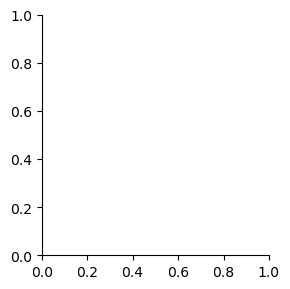

In [28]:
g = sns.FacetGrid(df)

You can assign individual columns and rows of a 'FacetGrid' to specific variables from the data set.

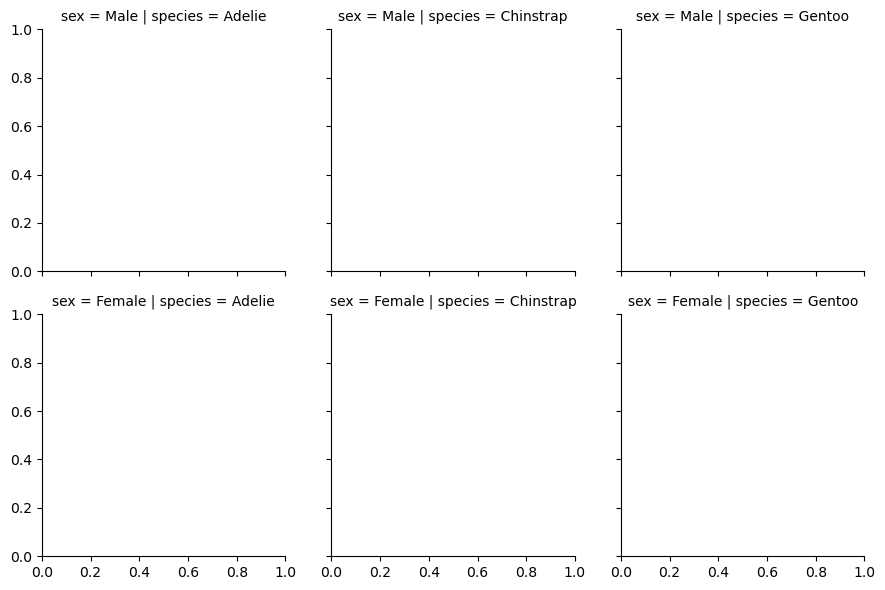

In [31]:
g = sns.FacetGrid(df, col="species", row="sex", hue="island")

Using the `.map` method of Facetgrid, it is possible to apply various plotting functions to each subplot (and its associated data) of a `FacetGrid`.

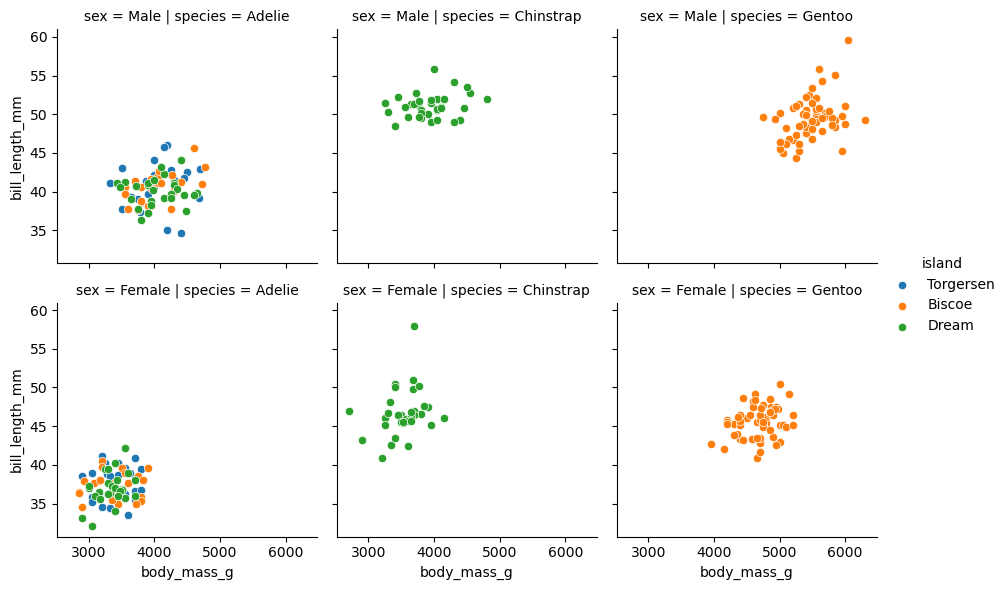

In [30]:
g.map(sns.scatterplot, "body_mass_g", "bill_length_mm")
g.add_legend()
g.figure

Certain plotting functions of Seaborn require the data as `DataFrame` via the `data` parameter. To apply those functions to the `FacetGrid` too, you can use the `.map_dataframe` method.


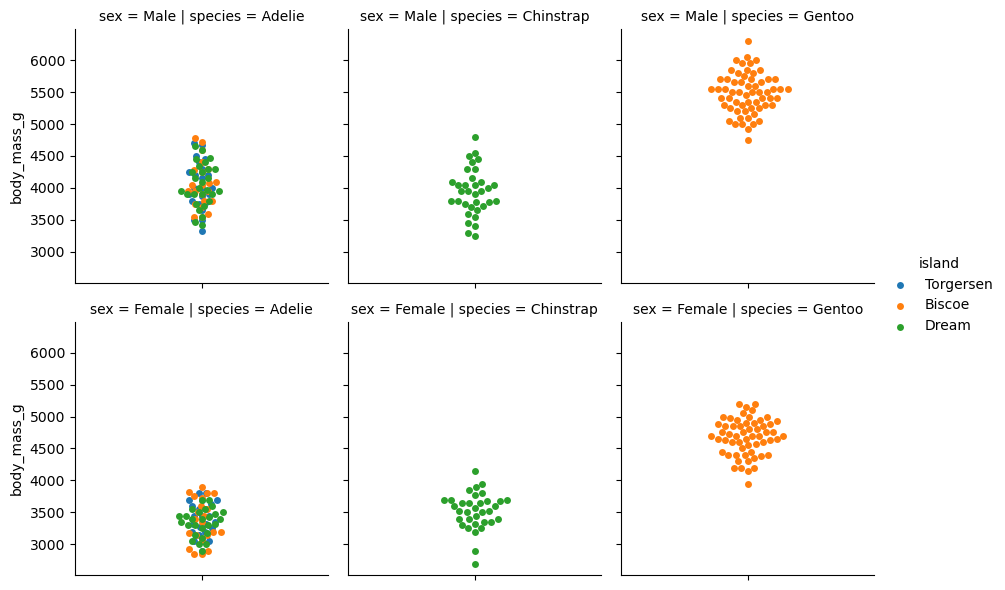

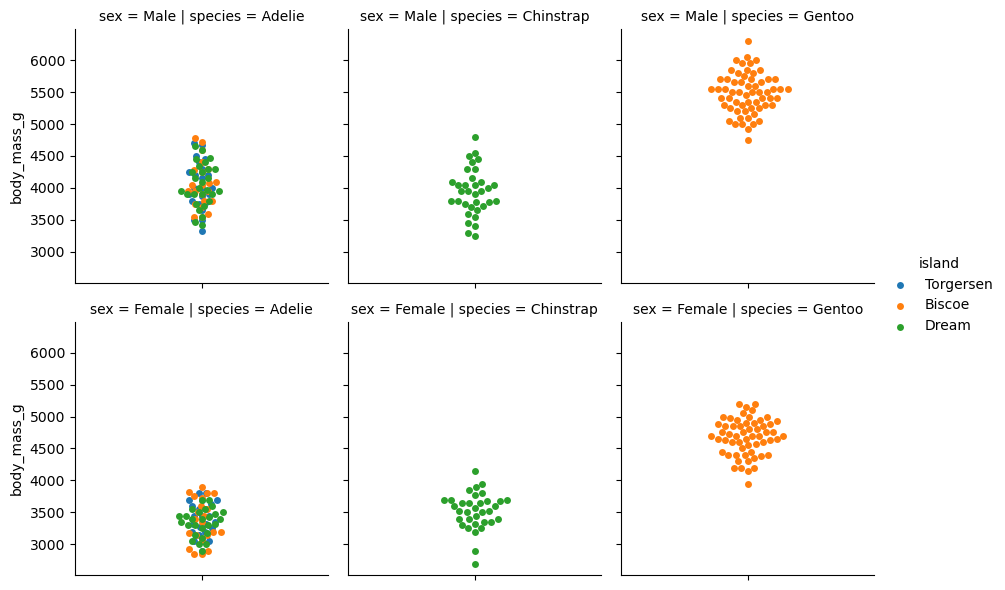

In [32]:
g = sns.FacetGrid(df, col="species", row="sex", hue="island")

g.map_dataframe(sns.swarmplot, y="body_mass_g") #reshape your data in a swarmplot
g.add_legend()
g.figure

FacetGrid objects encapsulate the subplots they contain in the `axes` attribute.

In [33]:
g.axes

array([[<Axes: title={'center': 'sex = Male | species = Adelie'}, ylabel='body_mass_g'>,
        <Axes: title={'center': 'sex = Male | species = Chinstrap'}>,
        <Axes: title={'center': 'sex = Male | species = Gentoo'}>],
       [<Axes: title={'center': 'sex = Female | species = Adelie'}, ylabel='body_mass_g'>,
        <Axes: title={'center': 'sex = Female | species = Chinstrap'}>,
        <Axes: title={'center': 'sex = Female | species = Gentoo'}>]],
      dtype=object)

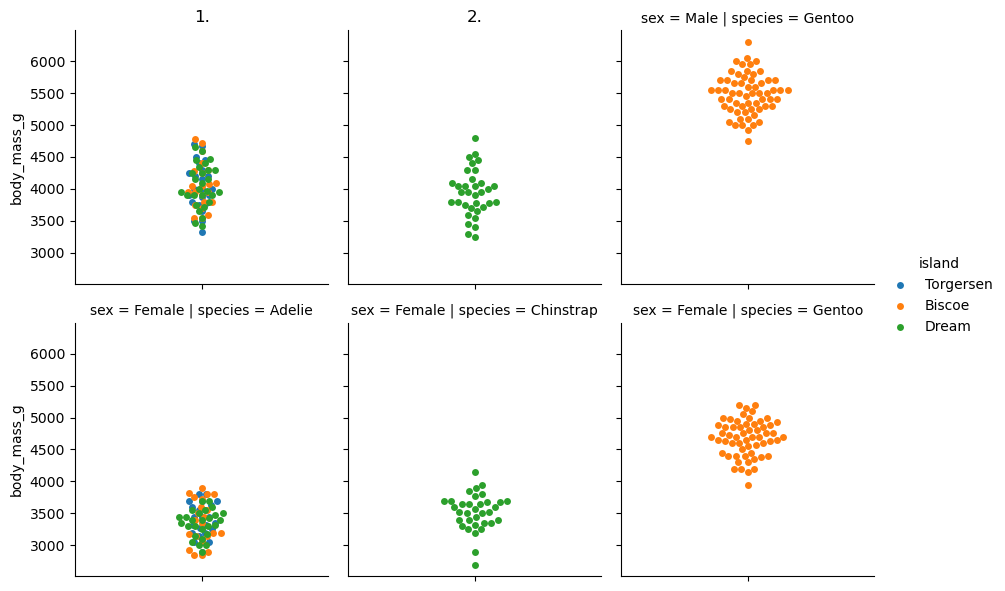

In [34]:
#define specific axes
g.axes[0][0].set_title("1.") 
g.axes[0][1].set_title("2.")
g.figure

The entire graphic is stored in the `figure` attribute.

These objects are again classic `matplotlib` graphics and can be adapted or processed accordingly.

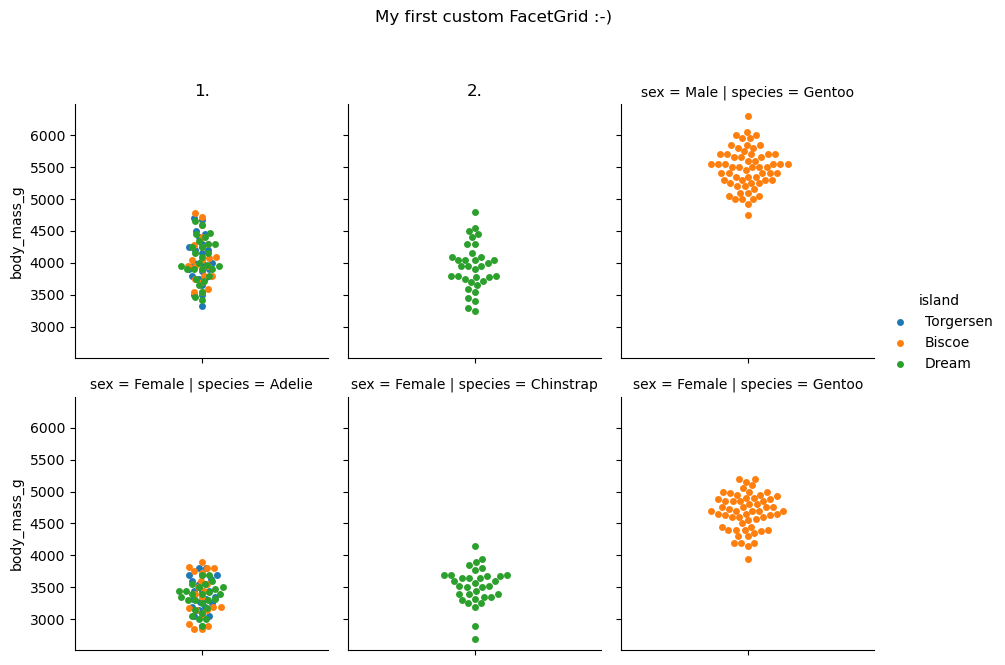

In [35]:
g.figure.suptitle("My first custom FacetGrid :-)", y=1.1)
g.figure

The advantage of 'FacetGrids' is that you can create and customize your own plots quite flexibly without having to drop any of `seaborn's` convenient features.

### `figure_level`-Plots

High-level plot functions, such as `relplot`, `catplot` or `displot` *mostly* return a `FacetGrid` object.

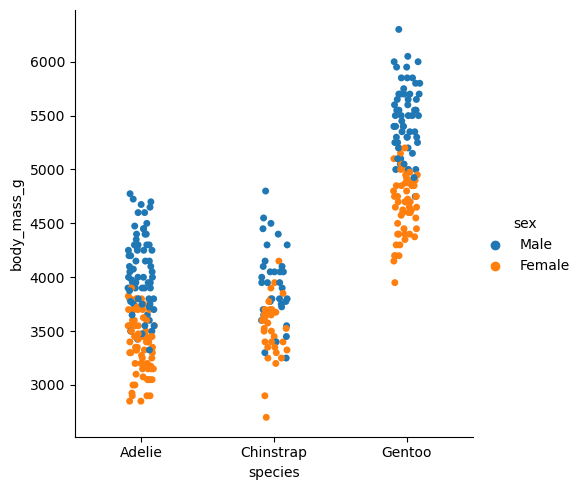

In [37]:
g = sns.catplot(x="species", y="body_mass_g", hue="sex", data=df)

In [38]:
type(g)

seaborn.axisgrid.FacetGrid

Since `FacetGrid` serve as containers for `axes`, `figure`, they are poorly adapted to other graphics and should be used to create a coherent graphic.

### `axes_level`-Plots

As the name suggests, `axes_level` plots return a `matplotlib` `axes` object. 
`axes_level` plots are intended to be a drop-in replacement for `matplotlib` functions and can be well integrated into other plots or `matplotlib` workflows.

In [39]:
data.head(3)

NameError: name 'data' is not defined

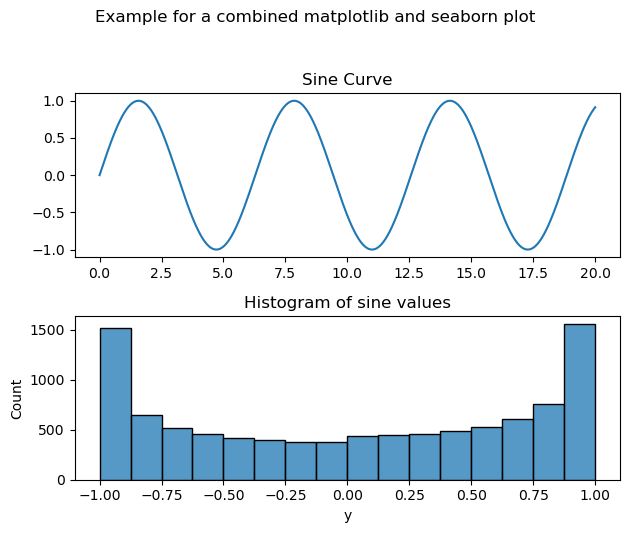

In [41]:
fig, axes = plt.subplots(2, 1)
axes[0].plot(data["x"], data["y"])
axes[0].set_title("Sine Curve")
sns.histplot(x=data["y"], ax=axes[1])
axes[1].set_title("Histogram of sine values")
fig.tight_layout()
fig.suptitle("Example for a combined matplotlib and seaborn plot", y=1.1)
plt.show()